Dataset from https://www.kaggle.com/competitions/dogs-vs-cats

In [1]:
# ! wget https://drive.usercontent.google.com/download?id=18PsGch7egeczC4zLjYw3dXGjHyL-Kebw

Dataset prepare instructions:

In [2]:
# import os

# os.mkdir('dataset_cats_dogs' )

# os.mkdir('dataset_cats_dogs/train')
# os.mkdir('dataset_cats_dogs/val')
# os.mkdir('dataset_cats_dogs/test')

# os.mkdir('dataset_cats_dogs/train/cats')
# os.mkdir('dataset_cats_dogs/train/dogs')

# os.mkdir('dataset_cats_dogs/val/cats')
# os.mkdir('dataset_cats_dogs/val/dogs')

# os.mkdir('dataset_cats_dogs/test/cats')
# os.mkdir('dataset_cats_dogs/test/dogs')

# cats_files = os.listdir('dataset_cats_dogs_orig/cats')
# dogs_files = os.listdir('dataset_cats_dogs_orig/dogs')

# # select random 2000 files and split into 1000, 500, 500
# import random
# random.seed(42)

# random.shuffle(cats_files)
# random.shuffle(dogs_files)

# train_cats = cats_files[:1000]
# val_cats = cats_files[1000:1500]
# test_cats = cats_files[1500:2000]

# train_dogs = dogs_files[:1000]
# val_dogs = dogs_files[1000:1500]
# test_dogs = dogs_files[1500:2000]

# import shutil

# for f in train_cats:
#     shutil.copy(os.path.join('dataset_cats_dogs_orig/cats', f), os.path.join('dataset_cats_dogs/train/cats', f))

# for f in val_cats:
#     shutil.copy(os.path.join('dataset_cats_dogs_orig/cats', f), os.path.join('dataset_cats_dogs/val/cats', f))

# for f in test_cats:
#     shutil.copy(os.path.join('dataset_cats_dogs_orig/cats', f), os.path.join('dataset_cats_dogs/test/cats', f))

# for f in train_dogs:
#     shutil.copy(os.path.join('dataset_cats_dogs_orig/dogs', f), os.path.join('dataset_cats_dogs/train/dogs', f))

# for f in val_dogs:
#     shutil.copy(os.path.join('dataset_cats_dogs_orig/dogs', f), os.path.join('dataset_cats_dogs/val/dogs', f))

# for f in test_dogs:
#     shutil.copy(os.path.join('dataset_cats_dogs_orig/dogs', f), os.path.join('dataset_cats_dogs/test/dogs', f))

# print('Done!')


In [6]:
from keras import models, layers
import numpy as np
from keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
import os
base_dir = '..\\lab2\\dataset_cats_dogs'
 
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
 
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [24]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
 

In [25]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [26]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
1/1 ━━━━━━━━━━━━━━━━━━

In [29]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
from keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [34]:
history = model.fit(
      train_features, train_labels,
      batch_size=batch_size,
      steps_per_epoch=100,
      epochs=30,
      validation_data=(validation_features, validation_labels),
      validation_steps=50,
      verbose=2)

Epoch 1/30
100/100 - 2s - 20ms/step - acc: 0.6575 - loss: 0.6137 - val_acc: 0.8380 - val_loss: 0.4386
Epoch 2/30
100/100 - 1s - 12ms/step - acc: 0.7920 - loss: 0.4518 - val_acc: 0.8560 - val_loss: 0.3660
Epoch 3/30
100/100 - 1s - 12ms/step - acc: 0.8355 - loss: 0.3761 - val_acc: 0.8670 - val_loss: 0.3347
Epoch 4/30
100/100 - 1s - 12ms/step - acc: 0.8690 - loss: 0.3266 - val_acc: 0.8730 - val_loss: 0.3127
Epoch 5/30
100/100 - 1s - 12ms/step - acc: 0.8780 - loss: 0.2951 - val_acc: 0.8740 - val_loss: 0.2965
Epoch 6/30
100/100 - 1s - 13ms/step - acc: 0.8895 - loss: 0.2721 - val_acc: 0.8730 - val_loss: 0.2875
Epoch 7/30
100/100 - 1s - 12ms/step - acc: 0.8890 - loss: 0.2628 - val_acc: 0.8840 - val_loss: 0.2761
Epoch 8/30
100/100 - 1s - 12ms/step - acc: 0.9070 - loss: 0.2470 - val_acc: 0.8790 - val_loss: 0.2758
Epoch 9/30
100/100 - 1s - 12ms/step - acc: 0.9060 - loss: 0.2330 - val_acc: 0.8930 - val_loss: 0.2674
Epoch 10/30
100/100 - 1s - 13ms/step - acc: 0.9100 - loss: 0.2183 - val_acc: 0.896

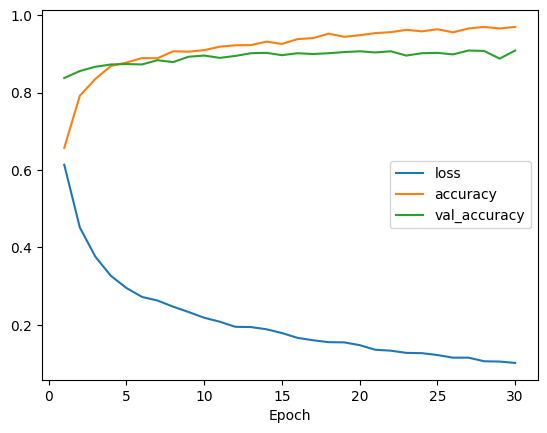

In [36]:
from matplotlib import pyplot as plt

# plot training history
plt.plot(range(1, 31), history.history['loss'], label='loss')
plt.plot(range(1, 31), history.history['acc'], label='accuracy')
plt.plot(range(1, 31), history.history['val_acc'], label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

In [37]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
 
print('test_acc:', test_acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9090 - loss: 0.2287 
test_acc: 0.9089999794960022


In [ ]:


expected, next(enumerate(test_imgs))

Found 1000 images belonging to 2 classes.


(array([[[[0.4156863 , 0.28235295, 0.24705884],
          [0.4156863 , 0.28235295, 0.24705884],
          [0.4156863 , 0.28235295, 0.24705884],
          ...,
          [0.36078432, 0.21568629, 0.18431373],
          [0.4039216 , 0.27058825, 0.23529413],
          [0.38431376, 0.2509804 , 0.21568629]],
 
         [[0.4156863 , 0.28235295, 0.24705884],
          [0.4156863 , 0.28235295, 0.24705884],
          [0.4156863 , 0.28235295, 0.24705884],
          ...,
          [0.35686275, 0.22352943, 0.18823531],
          [0.3803922 , 0.24705884, 0.21176472],
          [0.3921569 , 0.25882354, 0.22352943]],
 
         [[0.4156863 , 0.28235295, 0.24705884],
          [0.4156863 , 0.28235295, 0.24705884],
          [0.4156863 , 0.28235295, 0.24705884],
          ...,
          [0.35686275, 0.22352943, 0.18823531],
          [0.3647059 , 0.23137257, 0.19607845],
          [0.3921569 , 0.25882354, 0.22352943]],
 
         ...,
 
         [[0.14901961, 0.13333334, 0.09019608],
          [0.15686

Found 1000 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/ste

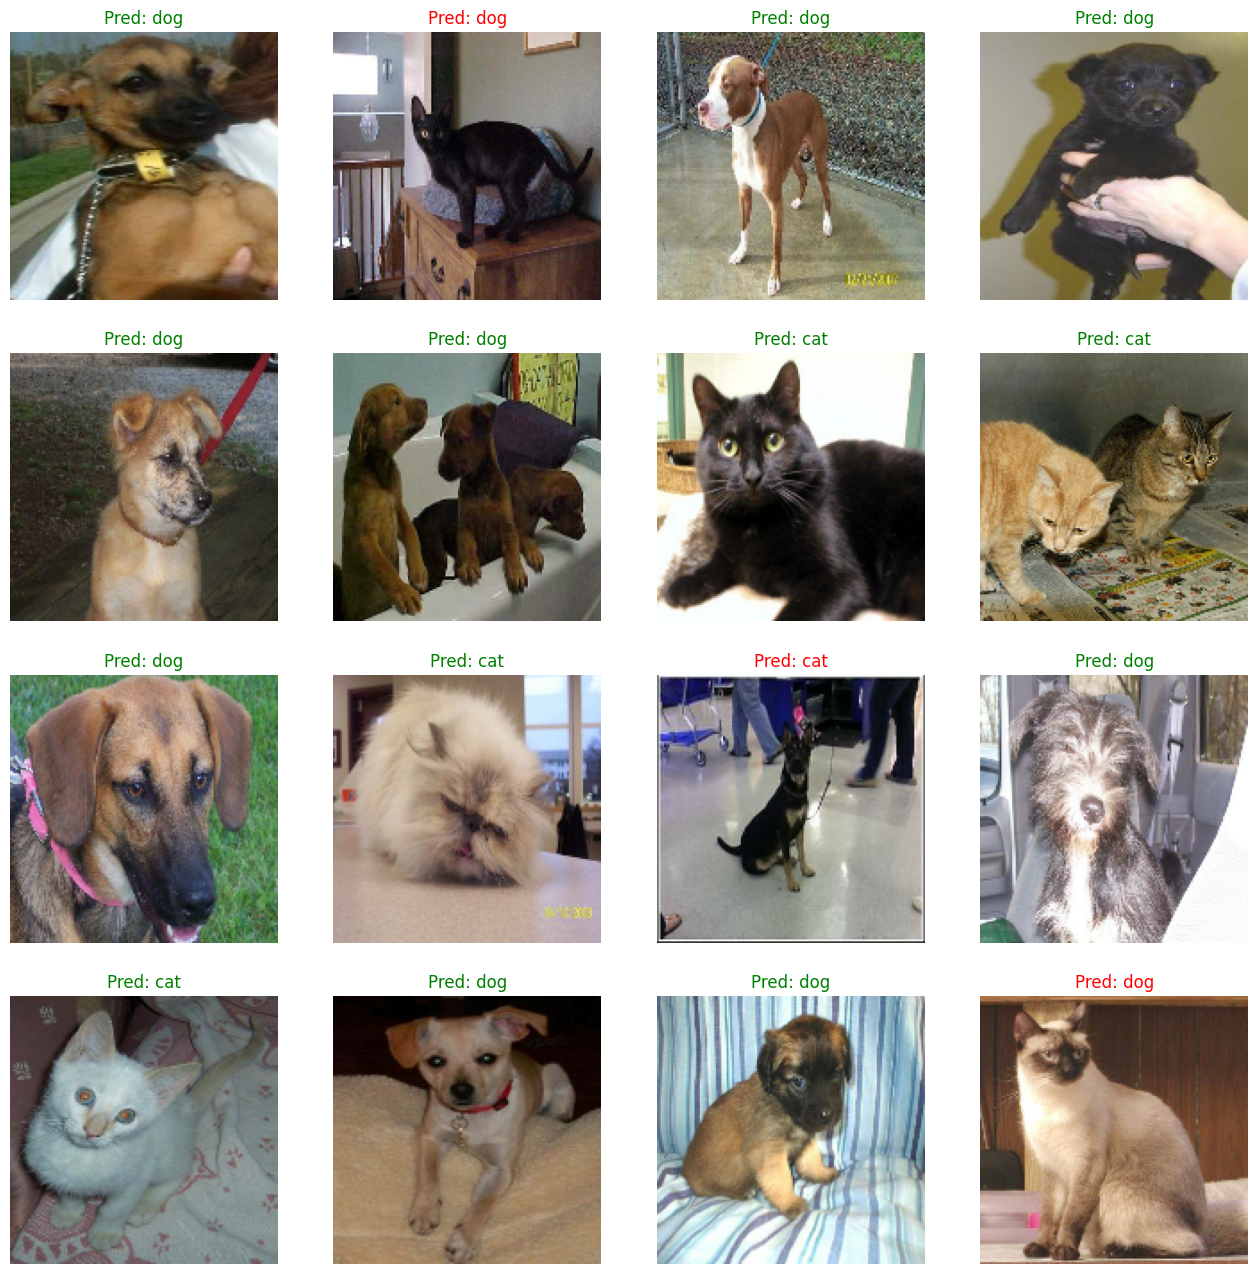

In [46]:
from tensorflow.keras.utils import image_dataset_from_directory

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

test_dataset = image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150),
    shuffle=True,
)

imgs, labels = test_dataset.as_numpy_iterator().next()


for i in range(4):
    for j in range(4):
        pred1 = conv_base.predict(imgs[i * 4 + j].reshape(1, 150, 150, 3))
        pred = model.predict(pred1)

        axs[i, j].imshow(imgs[i * 4 + j]/255.0, cmap='gray')
        axs[i, j].set_title(f"Pred: {'dog' if pred[0]>0.5 else 'cat'}", color=('green' if (pred[0]>0.5)==labels[i * 4 + j] else 'red'))
        axs[i, j].axis('off')